In [1]:

import os
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from collections import defaultdict 



In [2]:
def remove_missing_data(df):
        for col in df.columns:
            try:
                df[col].replace({".": np.nan}, inplace=True)
            except Exception as e:
                print(e, "\n No missing values in", col)

        return df.dropna()


In [3]:

sys.path.append("../codes")

import utilities as util



# Load data

In [4]:

data_sets_xls = pd.ExcelFile("../data/IA_report.xlsx")

print(data_sets_xls.sheet_names)




['dyslexia', 'risk', 'norm']


In [6]:

    
data_sets = defaultdict(list)


for sheet in data_sets_xls.sheet_names:
    tmp =  pd.read_excel(data_sets_xls, sheet)
    tmp = remove_missing_data(df=tmp)
    tmp.replace({"norm": 1, "dyslexia":2, "risk": 3}, inplace=True)
    tmp = tmp.astype({
        "Group": str,
        "SubjectID": str,
        "Sentence_ID":int, 
        "Word_Number": int, 
        "QUESTION_ACCURACY": int, 
        "FIXATION_COUNT": int, 
        "SKIP": int, 
        "TOTAL_READING_TIME": float, 
        "FIRST_FIXATION_DURATION": float,
        "FIRST_FIXATION_X": float, 
        "FIRST_FIXATION_Y": float, 
        "FIRST_RUN_TOTAL_READING_TIME": float, 
        "FIRST_SACCADE_AMPLITUDE": float, 
        "REGRESSION_IN": int, 
        "REGRESSION_OUT": int, 
        "REGRESSION_OUT_FULL": int, 
        "REGRESSION_PATH_DURATION": int,         
        })  

    data_sets[sheet] = tmp.sort_values(by=["SubjectID"]).dropna()

    print(sheet, tmp.shape)

    

dyslexia (12641, 17)
risk (4148, 17)
norm (39622, 17)


In [7]:
data_sets["norm"].head()

,Group,SubjectID,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION
40476,1,10,17,2,1,1,0,317.0,317.0,224.9,535.6,317.0,1.60,0,0,0,317
40379,1,10,21,4,-1,3,0,621.0,224.0,554.2,533.0,621.0,5.74,0,0,0,621
40380,1,10,21,5,-1,2,0,380.0,241.0,685.6,536.8,380.0,3.56,0,0,0,380
40381,1,10,21,6,-1,3,0,381.0,181.0,855.8,553.1,381.0,1.39,0,0,0,381
40382,1,10,21,7,-1,4,0,694.0,130.0,1049.7,542.9,694.0,4.89,0,0,0,694


In [8]:
data_sets["dyslexia"].head()

,Group,SubjectID,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION
2079,2,ake05,25,3,-1,6,0,2588.0,330.0,472.1,564.1,330.0,1.52,0,1,1,5213
2007,2,ake05,24,7,-1,13,0,4073.0,387.0,931.8,507.8,3005.0,2.06,1,0,0,3005
2006,2,ake05,24,6,-1,5,0,1093.0,127.0,775.9,540.9,1093.0,1.17,0,0,0,1093
2005,2,ake05,24,5,-1,6,0,1436.0,317.0,653.3,518.8,509.0,1.33,0,1,1,2235
2004,2,ake05,24,4,-1,9,0,3522.0,501.0,477.7,528.6,501.0,1.45,1,1,1,3183


In [9]:
data_sets["risk"].head()

,Group,SubjectID,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION
1339,3,m107,21,3,-1,7,1,2341.0,111.0,515.7,594.1,111.0,11.05,1,0,1,3121
1269,3,m107,13,2,0,4,0,909.0,206.0,236.5,540.1,909.0,1.39,0,0,0,909
1270,3,m107,13,3,0,2,0,564.0,239.0,450.7,520.1,239.0,2.00,1,0,0,239
1271,3,m107,13,4,0,3,0,660.0,314.0,543.5,536.9,314.0,1.67,0,1,1,985
1272,3,m107,13,5,0,1,0,222.0,222.0,729.1,529.2,222.0,1.61,0,0,0,222


In [10]:
data_dyslexia_cols = data_sets["dyslexia"].columns
data_norm_cols = data_sets["norm"].columns
data_risk_cols = data_sets["risk"].columns


In [11]:
data_dyslexia_cols == data_norm_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [12]:
data_norm_cols ==  data_risk_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [13]:

data = pd.concat([v for k, v in data_sets.items()], axis=0)
data.shape



(56411, 17)

In [14]:
data.head()

,Group,SubjectID,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION
2079,2,ake05,25,3,-1,6,0,2588.0,330.0,472.1,564.1,330.0,1.52,0,1,1,5213
2007,2,ake05,24,7,-1,13,0,4073.0,387.0,931.8,507.8,3005.0,2.06,1,0,0,3005
2006,2,ake05,24,6,-1,5,0,1093.0,127.0,775.9,540.9,1093.0,1.17,0,0,0,1093
2005,2,ake05,24,5,-1,6,0,1436.0,317.0,653.3,518.8,509.0,1.33,0,1,1,2235
2004,2,ake05,24,4,-1,9,0,3522.0,501.0,477.7,528.6,501.0,1.45,1,1,1,3183


In [15]:
data.columns == data_dyslexia_cols

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True])

In [16]:

# pd.get_dummies(data, columns=["Sex"])



In [17]:
# dyslexia = data.loc[data["Group"]=="dyslexia"]

# dyslexia = data_sets["dyslexia"]

In [23]:
def plot_pies(data, col, labels):
    
    fig = plt.figure(figsize=(20, 15))

    ctr = 1
    for k, v in data_sets.items():

        ax = fig.add_subplot(1, 3, ctr)  # three datasets
        x = [len(v[col].loc[v[col]==f]) for f in set(v[col])]
        if not labels:
            labels = set(v[col])
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels,
                                               autopct='%.2f', 
                                               textprops={'fontsize': 10},
                                              )
            labels = None
        else:   
            patches, texts, autotexts = ax.pie(x=x, 
                                               labels=labels, 
                                               autopct='%.2f', 
                                               textprops={'fontsize': 10}
                                              )
            
        plt.title(k, fontsize=20)
        ctr += 1
    plt.show()


    return None
    

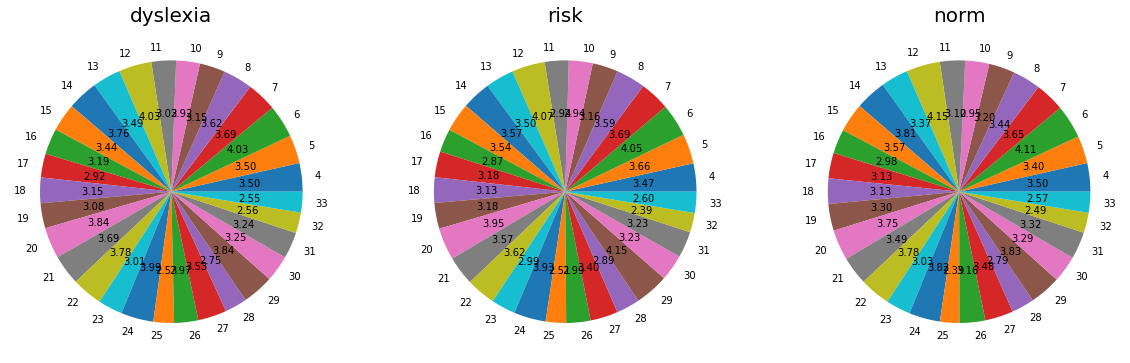

In [24]:

# Gender percentage: 
plot_pies(data=data_sets, col="Sentence_ID", labels=None)






- some participants skip some sentences


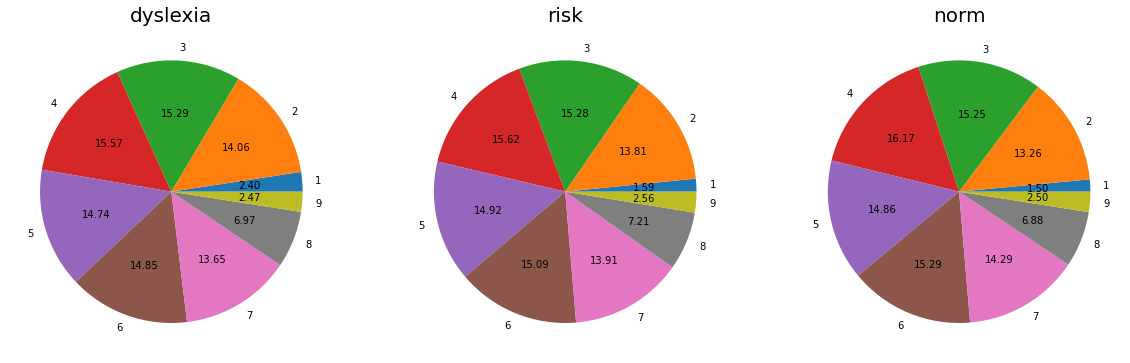

In [25]:

# Grages percentage:
plot_pies(data=data_sets, col="Word_Number", labels=None)




- the higher the word_number the higher the number of repeats



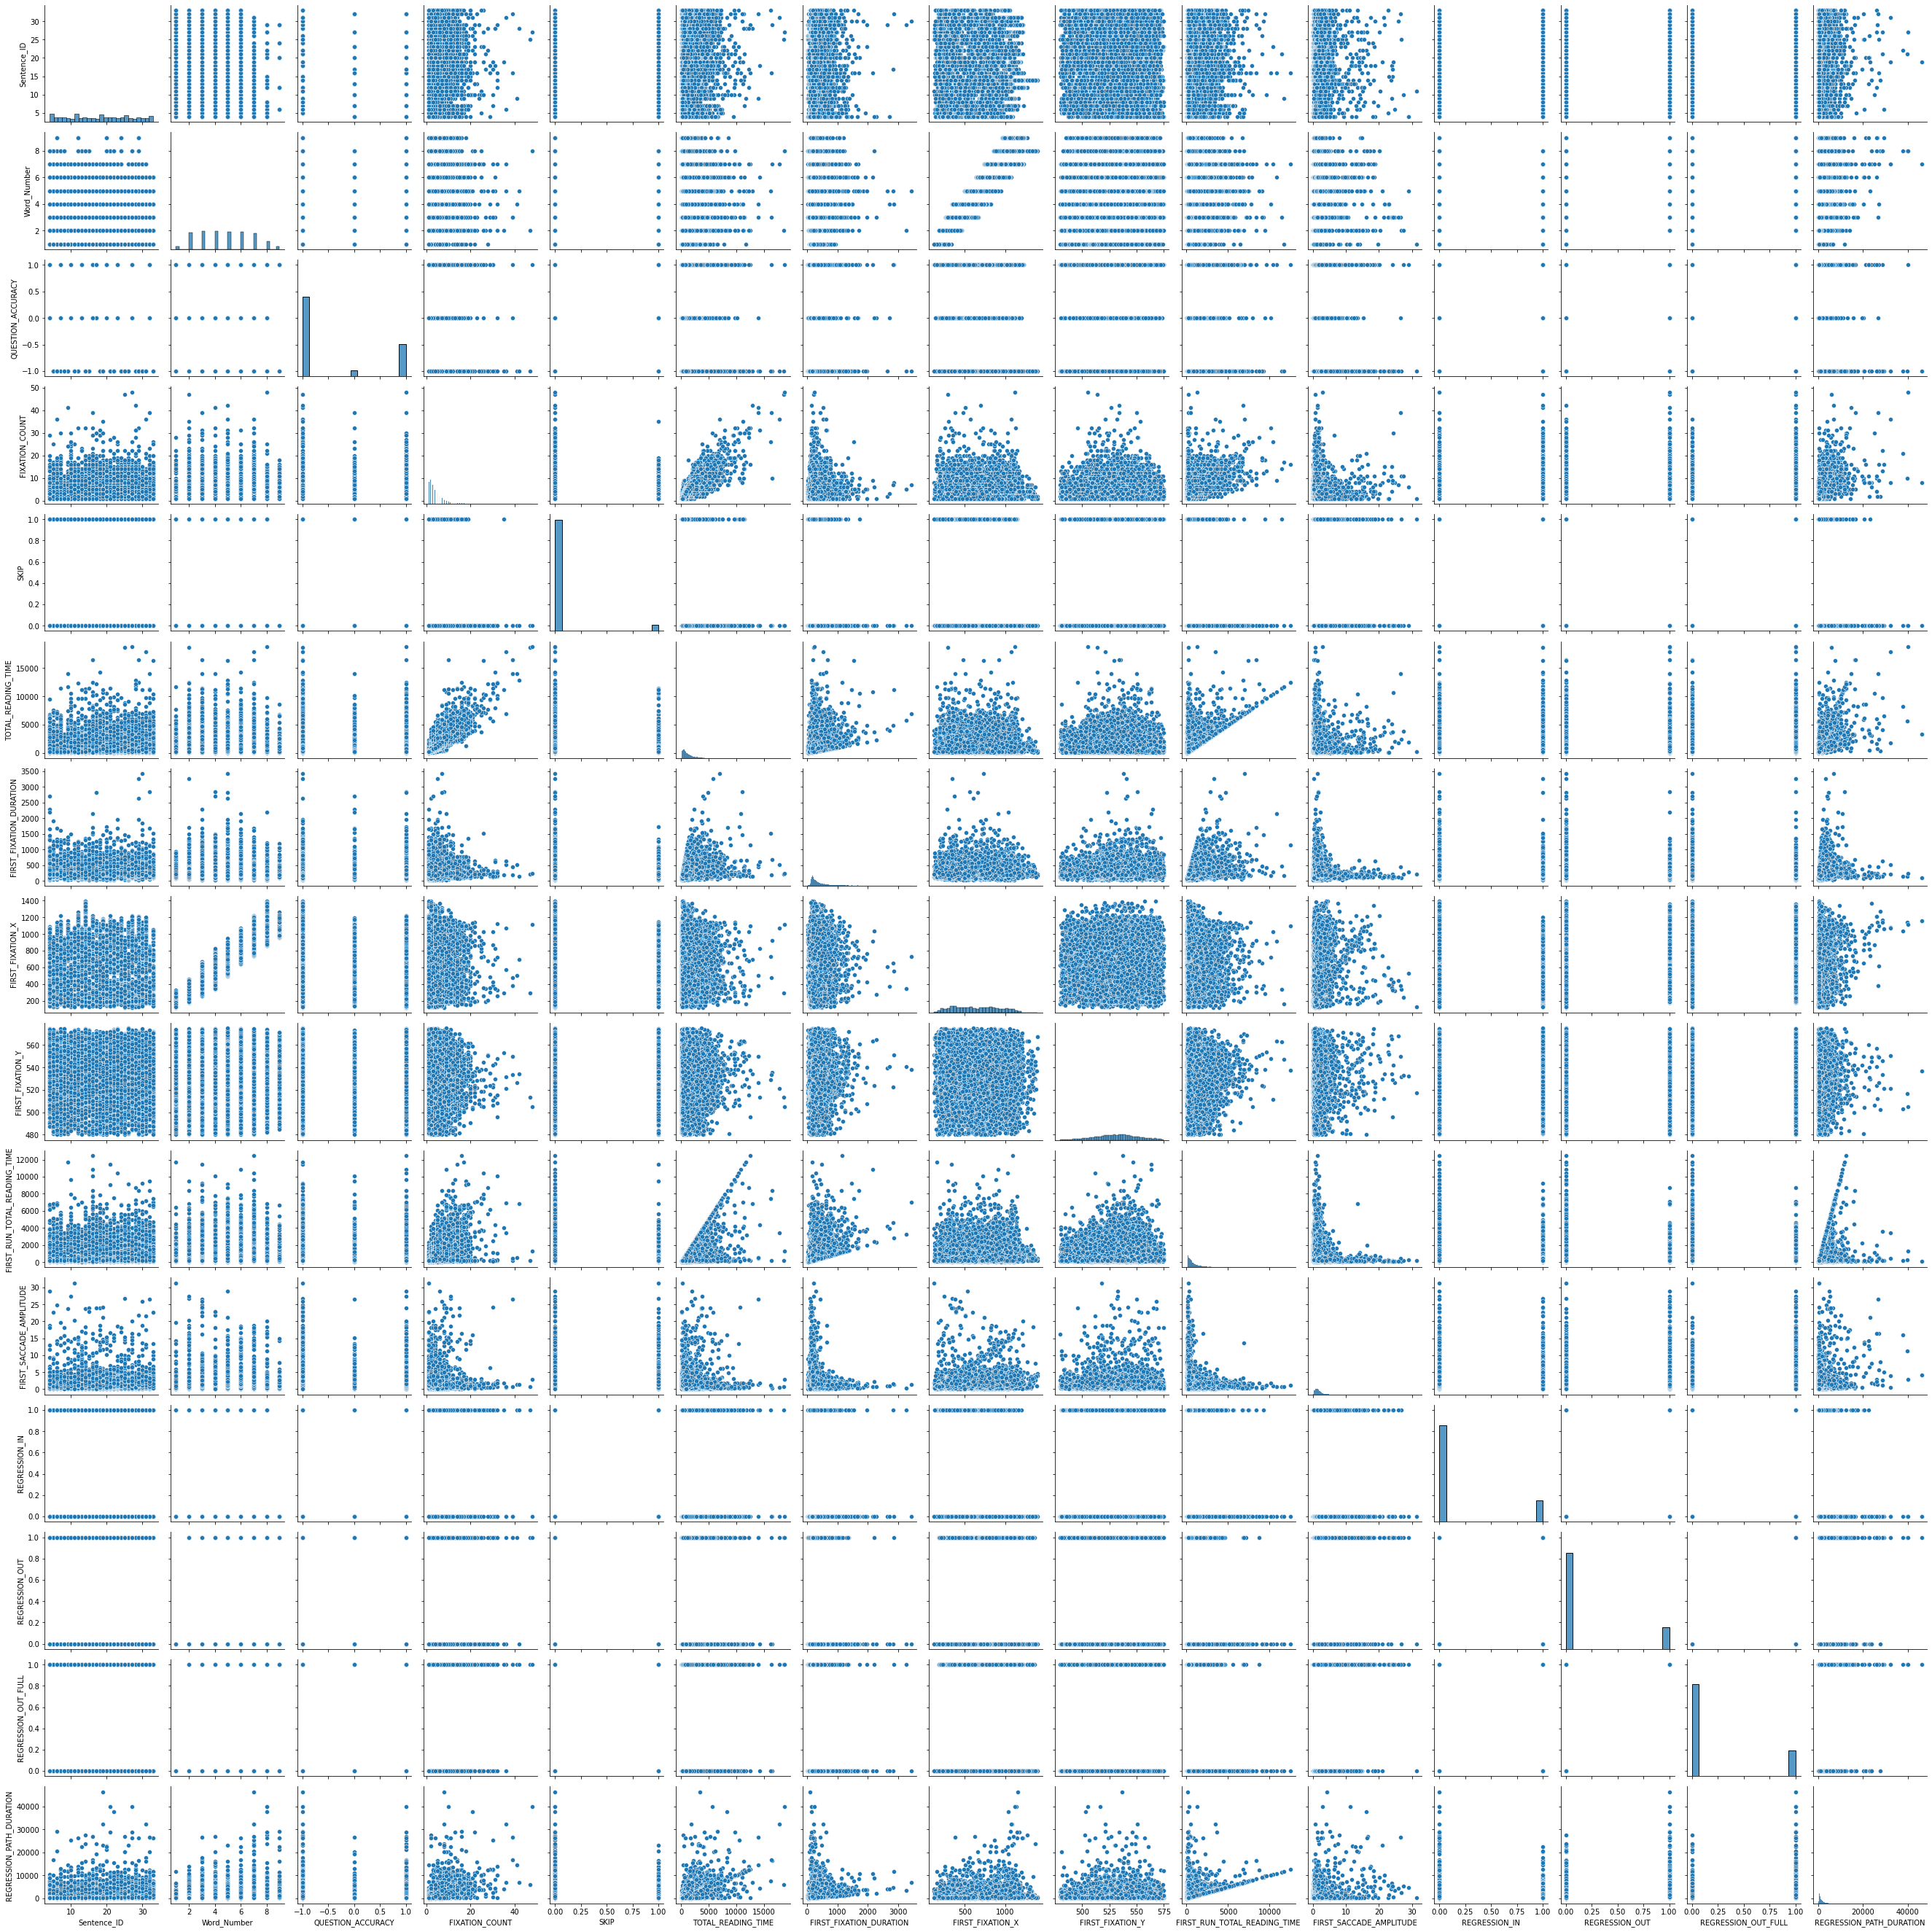

In [26]:

# Dyslexia pairplots:
sns.pairplot(data=data_sets["dyslexia"], )
plt.show()
    
    




- No linear correlation between any features

- features distribution could be important 


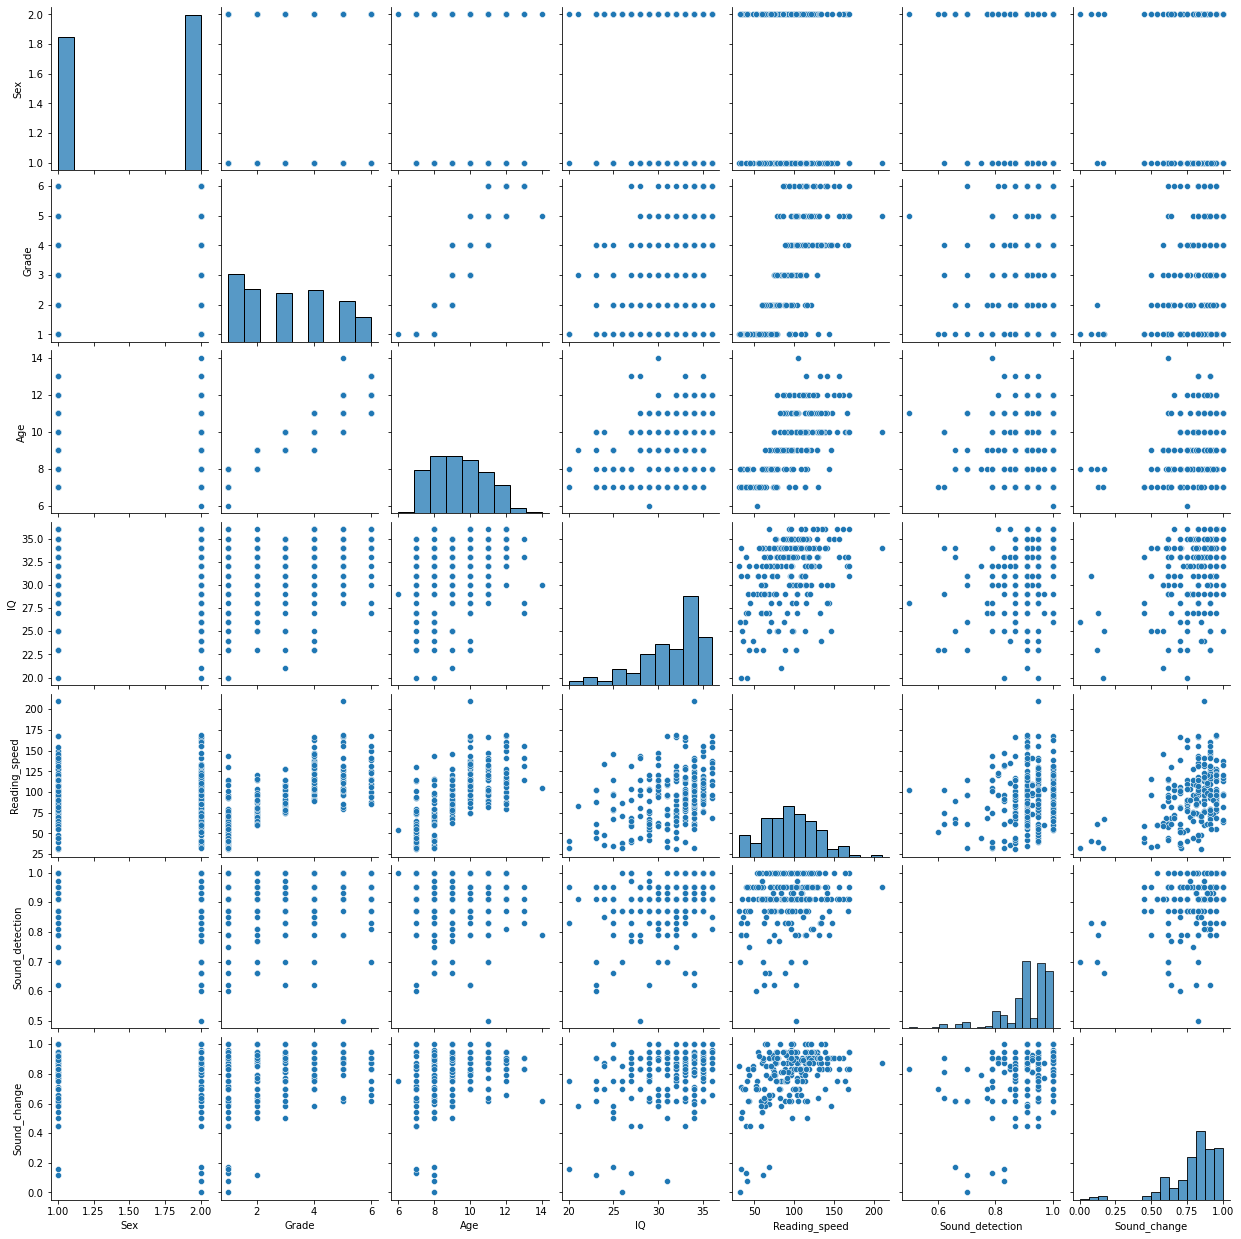

In [22]:

# Normal data pair-plots
sns.pairplot(data=data_sets["norm"], )
plt.show()





- No linear correlation between any features

- features distribution could be important 



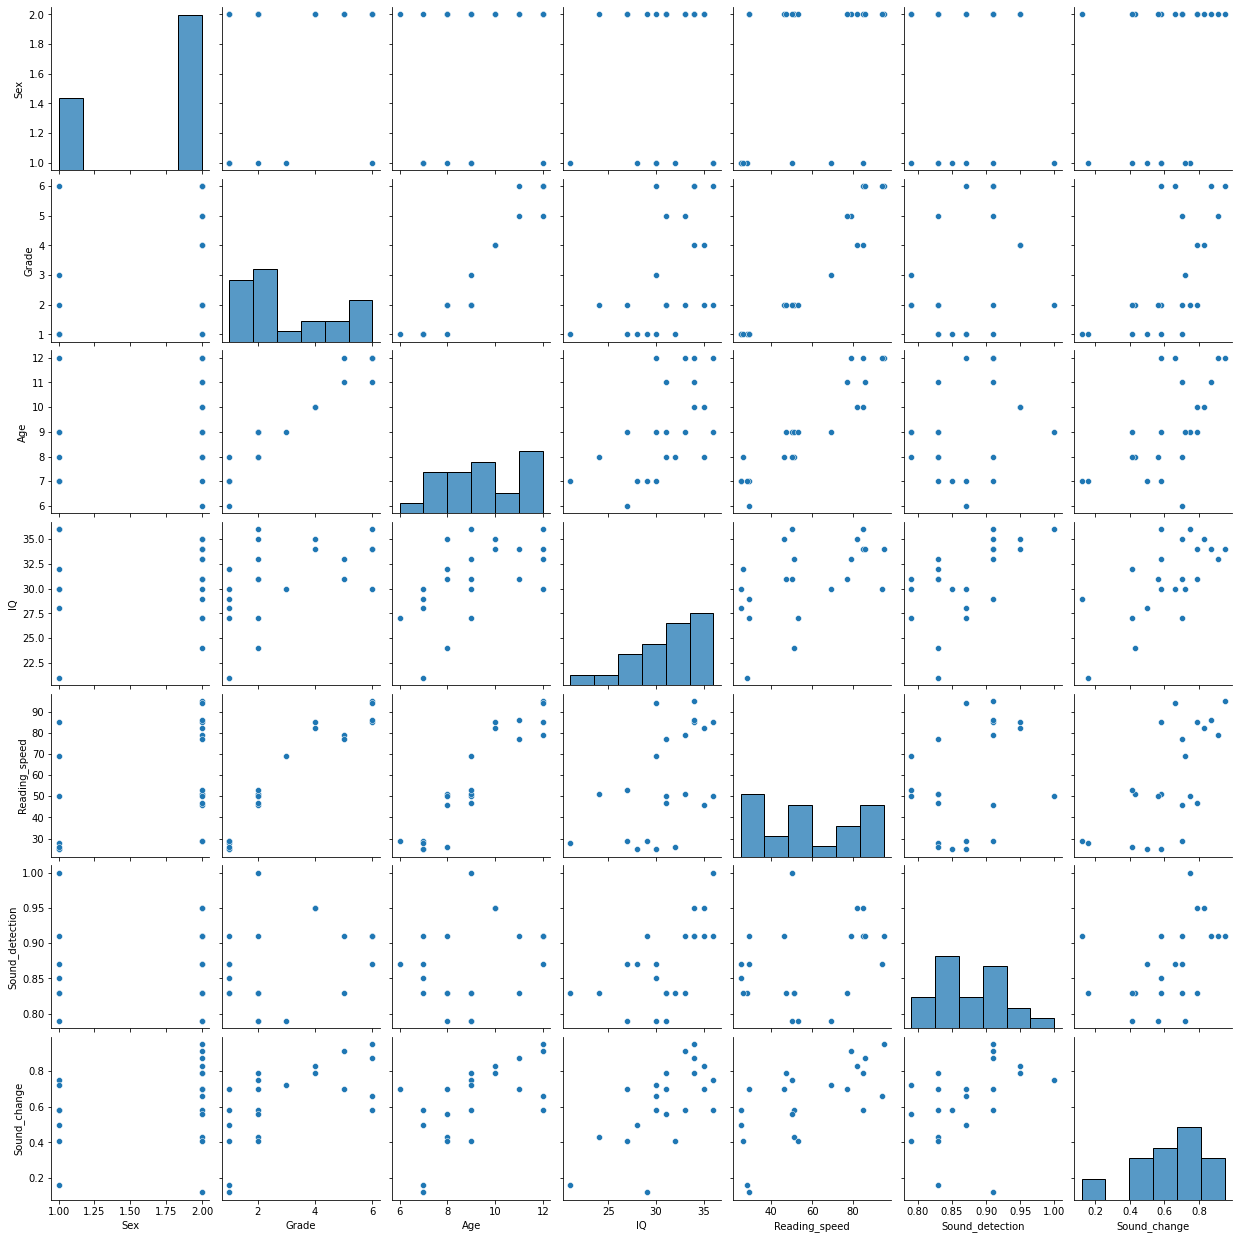

In [23]:


sns.pairplot(data=data_sets["risk"], )
plt.show()





- No linear correlation between any features

- features distribution could be important 


